# Homework 2 - Regression

The goal of this homework is to create a regression model for predicting the prices (column `'Final Price'`).



In [1]:
import pandas as pd
import numpy as np

In [2]:
# Get data if it doesn't exist

from pathlib import Path

if not Path('laptops.csv').is_file():
    !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv



In [3]:
df = pd.read_csv('laptops.csv')

In [4]:
# Normalize names of columns
df.columns = df.columns.str.lower().str.replace(' ', '_')

# We will only be using these columns: ram, storage, screen, final_price
df = df[['ram', 'storage', 'screen', 'final_price']]

<Axes: xlabel='final_price', ylabel='Count'>

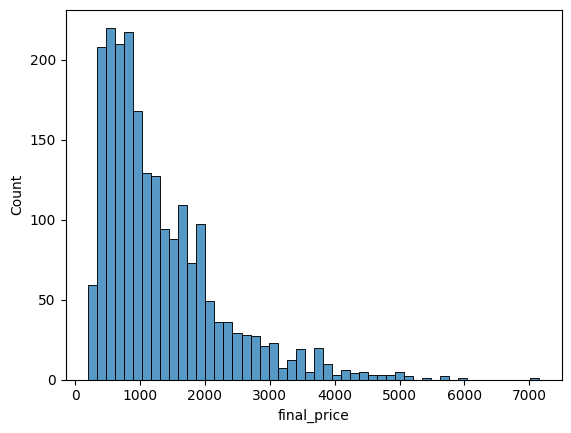

In [5]:
# Distribution of final_price.  Does it have a long tail?
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.histplot(df.final_price, bins=50)

In [6]:
# QUESTOIN 1 which column has missing values?

df.isnull().sum()

# Answer: screen


ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [7]:
df.columns


Index(['ram', 'storage', 'screen', 'final_price'], dtype='object')

In [8]:
# QUESTION 2: What is the median for the variable 'ram'?

median_ram = df['ram'].median()


print("MEDIAN RAM: ", median_ram)



MEDIAN RAM:  16.0


In [9]:
# split data into train, validation, test data sets
# split by 60%/20%/20%

n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print("Number of values:", n)

print(f'#Val: {n_val}, #Test: {n_test}, #Train: {n_train}')


df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]



Number of values: 2160
#Val: 432, #Test: 432, #Train: 1296


In [10]:
# randomly arange the data
idx = np.arange(n)

np.random.seed(42) # helps make subsets re-producable
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train.head()



,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [11]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [12]:

# drop index(reset it)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# log transformation? and get numpy obj.
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [13]:
# QUESTION 3: hich option gives better RMSE?

df_train.iloc[10]

ram         16.0
storage    512.0
screen      15.6
Name: 10, dtype: float64

In [14]:
xi = [8.0, 256.0, 15.6]
w0 = 7.17                   # biased term
w = [0.01, 0.04, 0.002]     # weight

# yi = 12.312
#xi = [453, 11, 86]
#w0 = 7.17
#w = [0.01, 0.04, 0.002]

In [15]:
def linear_regression(xi):
    n = len(xi)
    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [16]:
yi = linear_regression(xi)

# have to invert log of value
print(np.expm1(yi))

# get orig value
print(np.log1p(np.expm1(yi)))

40678081.83157394
17.5212


In [17]:
def dot(xi, w):
    n = len(xi)
    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [18]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [19]:
w_new = [w0] + w

In [20]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [21]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [22]:
linear_regression(xi)

17.5212

In [23]:
w0 = 7.17                   # biased term
w = [0.01, 0.04, 0.002]     # weight
w_new = [w0] + w

In [24]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [25]:
#

df_train.columns




Index(['ram', 'storage', 'screen'], dtype='object')

In [26]:
base = ['ram', 'storage', 'screen']

# replace missing vlaues with 0
X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [27]:
w0

np.float64(676.8954853003995)

In [28]:
w

array([ 43.70681555,   0.86506867, -36.10399833])

<Axes: ylabel='Count'>

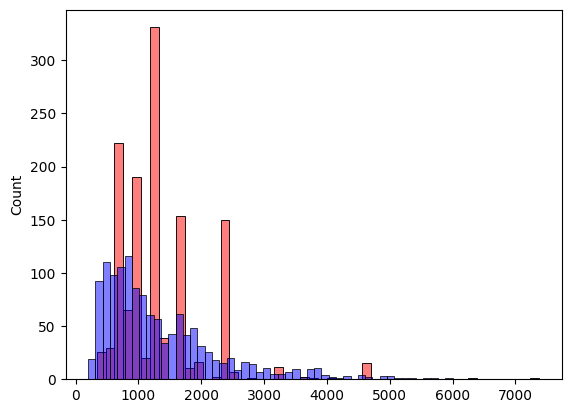

In [29]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [30]:
# Calc RMSE

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)




In [31]:
rmse(y_train, y_pred)

np.float64(602.3920520606714)

<Axes: ylabel='Count'>

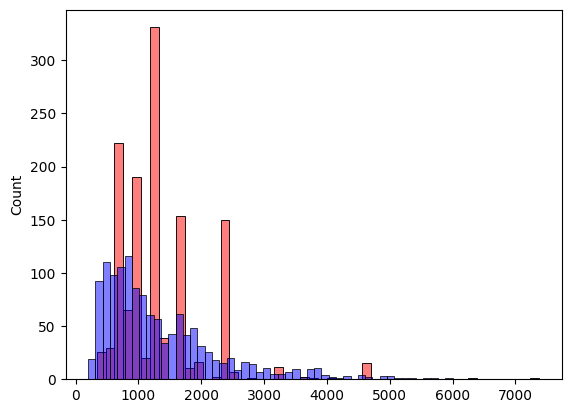

In [32]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [33]:
rmse(y_train, y_pred)

np.float64(602.3920520606714)

In [34]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [35]:
# get model from training set

mean = df_train.ram.mean()

X_train = prepare_X(df_train, mean)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, mean)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)


np.float64(600.3637630345228)

In [36]:


X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(597.7323452707584)

In [37]:
# Q4 Regularization

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]



In [38]:

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:

    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    print(f"{r}: {rmse(y_val, y_pred)}")



0: 597.3635593619622
0.01: 597.3616819856013
0.1: 597.345159296362
1: 597.2121215589519
5: 597.0111186297033
10: 597.0587680661115
100: 597.9032640603043


In [39]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [41]:
# Q5

# split data into train, validation, test data sets
# split by 60%/20%/20%

rmse_list = []


for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    print("Number of values:", n)

    print(f'#Val: {n_val}, #Test: {n_test}, #Train: {n_train}')


    df_train = df.iloc[:n_train]
    df_val = df.iloc[n_train:n_train+n_val]
    df_test = df.iloc[n_train+n_val:]

    # randomly arange the data
    idx = np.arange(n)

    np.random.seed(s) # helps make subsets re-producable
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    # drop index(reset it)
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # log transformation? and get numpy obj.
    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']


    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)

    result = rmse(y_val, y_pred)
    print(s, result)

    rmse_list.append(result)



Number of values: 2160
#Val: 432, #Test: 432, #Train: 1296
0 565.4520868771027
Number of values: 2160
#Val: 432, #Test: 432, #Train: 1296
1 636.7985423056726
Number of values: 2160
#Val: 432, #Test: 432, #Train: 1296
2 588.9558697907962
Number of values: 2160
#Val: 432, #Test: 432, #Train: 1296
3 597.8148920012521
Number of values: 2160
#Val: 432, #Test: 432, #Train: 1296
4 571.962791511102
Number of values: 2160
#Val: 432, #Test: 432, #Train: 1296
5 573.2383256618949
Number of values: 2160
#Val: 432, #Test: 432, #Train: 1296
6 647.3438328407208
Number of values: 2160
#Val: 432, #Test: 432, #Train: 1296
7 550.4398184485952
Number of values: 2160
#Val: 432, #Test: 432, #Train: 1296
8 587.333503616991
Number of values: 2160
#Val: 432, #Test: 432, #Train: 1296
9 576.1017929433108


In [43]:
np.std(rmse_list)

np.float64(29.17649125829274)

In [49]:
# Q6
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

# combine train and val datasets

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train, fillna_value=0)
y_full_train = np.concatenate([y_train, y_val])
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test, fillna_value=0)
y_pred = w_0 + X_test.dot(w)

result = rmse(y_test, y_pred)
print(result)



608.609982204956
